### Проект 5 [Одобрение кредита]

Вам предоставляется набор данных. Набор данных уже разделен на ```train_data.csv``` и ```test_data.csv```.

**Цель:** построить модели для **одобрения кредита** (```"Credit Default"```).

Пожалуйста, включите подробные объяснения следующих шагов:

1. Очистка, предварительная обработка данных, и Exploratory Data Analysis

2. Обучение и проверка моделей.

3. Сравнение моделей на основе метрик классификации: ```F-score```, ```Precision```, ```Recall```.

**Примечание:** вам **рекомендуется** искать так же другие алгоритмы машинного обучения в Интернете (не ограничиваясь материалом курса), но вы должны изучить и понять эти алгоритмы. Вы не можете удалить ни одну строку в файле ```test_data.csv```.

1. Очистка и предварительная обработка данных и EDA

Для начала импортируем необходимые пакеты для обработки данных

In [1]:
import numpy as no 
import pandas as pd
import piplite
await piplite.install('seaborn')
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Загружаем данные

In [3]:
train_data = pd.read_csv('./train_data.csv')
train_data.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0  Home Mortgage            NaN            10+ years        0.0   
1           Rent       767904.0               1 year        0.0   
2       Own Home            NaN              9 years        0.0   
3  Home Mortgage      1267395.0              3 years        0.0   
4           Rent      1813493.0              7 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     10.0                     21.8             267762.0   
1                      9.0                     15.4             275528.0   
2                     14.0                     27.1            1635590.0   
3                     11.0                     11.8             137676.0   
4                     19.0                     14.0             501556.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0                           NaN           0.0   
1                        0.0                          73.0           0.0   
2                        1.0                           NaN           0.0   
3                        1.0                          61.0           0.0   
4                        0.0                           6.0           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term             193358.0   
1  debt consolidation  Short Term             222288.0   
2  debt consolidation  Short Term             433268.0   
3   home improvements  Short Term           99999999.0   
4  debt consolidation  Short Term             265232.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                140372.0       19404.0           NaN               0  
1                168226.0       18302.0         718.0               0  
2               1017032.0       15295.0           NaN               0  
3                 34124.0       25559.0         719.0               0  
4                114779.0       23877.0         713.0               0

In [4]:
test_data = pd.read_csv('./test_data.csv')
test_data.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0  Home Mortgage      1886510.0            10+ years        0.0   
1           Rent       869877.0               1 year        0.0   
2  Home Mortgage            NaN              6 years        0.0   
3  Home Mortgage      1125142.0              8 years        0.0   
4  Home Mortgage      1060998.0            10+ years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     13.0                     17.1             552398.0   
1                     16.0                     14.2             657690.0   
2                     13.0                     16.5             638704.0   
3                     17.0                     16.5             570548.0   
4                      7.0                     18.9             379764.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0                           NaN           0.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        0.0                           NaN           0.0   
4                        0.0                          27.0           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term             595782.0   
1  debt consolidation   Long Term             501380.0   
2  debt consolidation  Short Term             238150.0   
3  debt consolidation   Long Term             393096.0   
4  debt consolidation  Short Term             268048.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                155059.0       26097.0         708.0               0  
1                259008.0       19645.0         638.0               1  
2                424745.0       28795.0           NaN               0  
3                284810.0       22597.0         676.0               0  
4                188252.0        5438.0         739.0               0

In [5]:
train_data.describe()

Annual Income    Tax Liens  Number of Open Accounts  \
count   5.350000e+03  6750.000000              6750.000000   
mean    1.368478e+06     0.029333                11.129037   
std     8.443128e+05     0.268953                 4.902738   
min     1.645970e+05     0.000000                 2.000000   
25%     8.459892e+05     0.000000                 8.000000   
50%     1.170913e+06     0.000000                10.000000   
75%     1.643780e+06     0.000000                14.000000   
max     9.338880e+06     7.000000                43.000000   

       Years of Credit History  Maximum Open Credit  \
count              6750.000000         6.750000e+03   
mean                 18.325393         9.048968e+05   
std                   7.076157         1.622644e+07   
min                   4.000000         0.000000e+00   
25%                  13.500000         2.795375e+05   
50%                  17.000000         4.771140e+05   
75%                  21.800000         7.906250e+05   
max                  57.700000         1.304726e+09   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                6750.000000                   3075.000000   6738.000000   
mean                    0.169778                     34.737886      0.118433   
std                     0.497055                     21.732259      0.348344   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     32.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                     7.000000                    118.000000      4.000000   

       Current Loan Amount  Current Credit Balance   Monthly Debt  \
count         6.750000e+03            6.750000e+03    6750.000000   
mean          1.187307e+07            2.888319e+05   18339.610815   
std           3.192640e+07            3.214734e+05   11930.628435   
min           1.124200e+04            0.000000e+00       0.000000   
25%           1.796190e+05            1.126748e+05   10068.750000   
50%           3.099360e+05            2.084490e+05   16161.000000   
75%           5.194750e+05            3.598838e+05   23900.500000   
max           1.000000e+08            6.506797e+06  136679.000000   

       Credit Score  Credit Default  
count   5350.000000     6750.000000  
mean    1147.825234        0.285185  
std     1599.628242        0.451536  
min      585.000000        0.000000  
25%      711.000000        0.000000  
50%      731.000000        0.000000  
75%      743.000000        1.000000  
max     7510.000000        1.000000

Проверяем данные на наличие отсутствующих значений

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                6750 non-null   object 
 1   Annual Income                 5350 non-null   float64
 2   Years in current job          6418 non-null   object 
 3   Tax Liens                     6750 non-null   float64
 4   Number of Open Accounts       6750 non-null   float64
 5   Years of Credit History       6750 non-null   float64
 6   Maximum Open Credit           6750 non-null   float64
 7   Number of Credit Problems     6750 non-null   float64
 8   Months since last delinquent  3075 non-null   float64
 9   Bankruptcies                  6738 non-null   float64
 10  Purpose                       6750 non-null   object 
 11  Term                          6750 non-null   object 
 12  Current Loan Amount           6750 non-null   float64
 13  Cur

In [7]:
train_data.isnull().sum()

Home Ownership                     0
Annual Income                   1400
Years in current job             332
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    3675
Bankruptcies                      12
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1400
Credit Default                     0
dtype: int64

In [8]:
features_with_nan = train_data.isna().sum()
features_with_nan

Home Ownership                     0
Annual Income                   1400
Years in current job             332
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    3675
Bankruptcies                      12
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1400
Credit Default                     0
dtype: int64

In [9]:
features_with_nan/len(train_data) * 100

Home Ownership                   0.000000
Annual Income                   20.740741
Years in current job             4.918519
Tax Liens                        0.000000
Number of Open Accounts          0.000000
Years of Credit History          0.000000
Maximum Open Credit              0.000000
Number of Credit Problems        0.000000
Months since last delinquent    54.444444
Bankruptcies                     0.177778
Purpose                          0.000000
Term                             0.000000
Current Loan Amount              0.000000
Current Credit Balance           0.000000
Monthly Debt                     0.000000
Credit Score                    20.740741
Credit Default                   0.000000
dtype: float64

Как можно видеть, имеются 5 признаков с отсутствующими значениями. Рассмотрим каждую из них

В признаке "Annual Income" отсутствует 20.7 % данных
Данный признак показывает годовой доход человека. В случае, если данные отсутствуют, это свидетельствует о неизвестном доходе. Чтобы понять, чем заполнять пустые строки, произведём проверку на ассиметрию

In [10]:
features_only_with_nan = features_with_nan.loc[features_with_nan != 0]
features_only_with_nan

Annual Income                   1400
Years in current job             332
Months since last delinquent    3675
Bankruptcies                      12
Credit Score                    1400
dtype: int64

In [11]:
train_data['Annual Income'].skew()

2.955649214073331

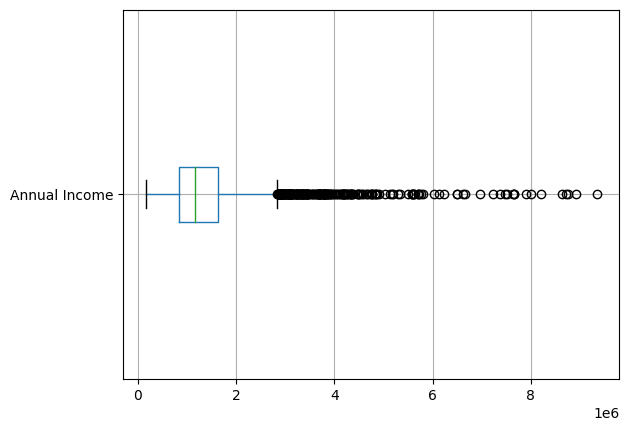

In [12]:
train_data.boxplot(['Annual Income'], vert = False);

Как мы можем видеть, смещение данных идёт в правую сторону, что свидетельствует о том, что нужно использовать медианные значения для заполнения пустых строк

In [13]:
train_data['Annual Income'].fillna(train_data['Annual Income'].median(), inplace = True)
test_data['Annual Income'].fillna(test_data['Annual Income'].median(), inplace = True)

In [14]:
train_data['Annual Income']

0       1170913.0
1        767904.0
2       1170913.0
3       1267395.0
4       1813493.0
          ...    
6745     840902.0
6746    1170913.0
6747    1414892.0
6748    1896333.0
6749    1170913.0
Name: Annual Income, Length: 6750, dtype: float64

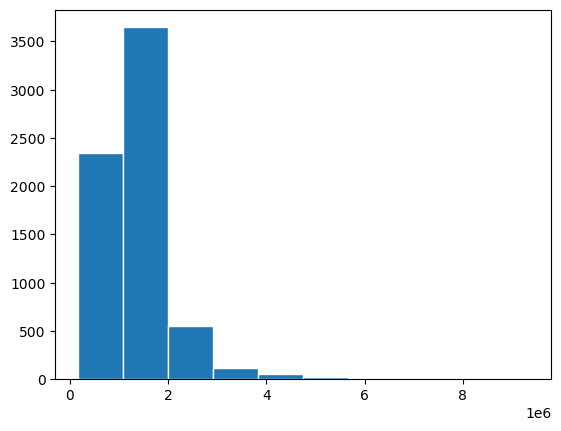

In [15]:
plt.hist(train_data['Annual Income'], bins = 10, edgecolor = 'w');

Основная часть данных находится в интервале от 165 тыс. до 2 млн

Следующий параметр "Years in current job" показывает, сколько лет работает человек на текущем месте. Этот параметр является категориальным.

In [16]:
unique_elems_years_in_cur_job = train_data['Years in current job'].unique()
unique_elems_years_in_cur_job

array(['10+ years', '1 year', '9 years', '3 years', '7 years', nan,
       '8 years', '6 years', '< 1 year', '4 years', '5 years', '2 years'],
      dtype=object)

Данный признак включает строковые данные. Для начала нам нужно извлечь числа из строк, и перевести их в категориальные данные.

In [17]:
train_data['Years in current job'] = train_data['Years in current job'].str.extract(r"(\d+)")
train_data['Years in current job'] = train_data['Years in current job'].astype(float)

test_data['Years in current job'] = test_data['Years in current job'].str.extract(r"(\d+)")
test_data['Years in current job'] = test_data['Years in current job'].astype(float)

train_data['Years in current job']



0       10.0
1        1.0
2        9.0
3        3.0
4        7.0
        ... 
6745     1.0
6746    10.0
6747     8.0
6748     3.0
6749     7.0
Name: Years in current job, Length: 6750, dtype: float64

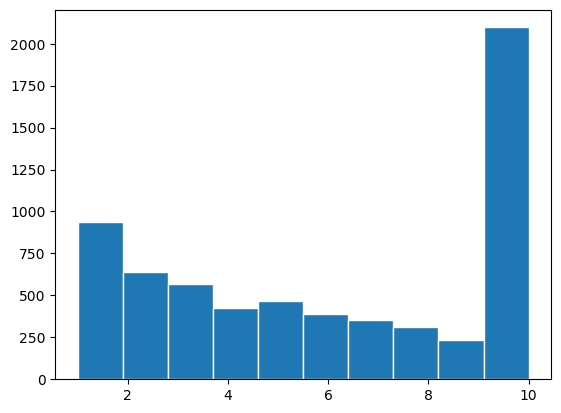

In [18]:
plt.hist(train_data['Years in current job'], edgecolor = 'w');

По гистограмме видно, что больше всего людей с опытом от 9 лет и выше.

Также имеются отсутствующие данные в данном признаке. Заполним их средним значением

In [19]:
train_data['Years in current job'].fillna(train_data['Years in current job'].mean(), inplace = True)
test_data['Years in current job'].fillna(test_data['Years in current job'].mean(), inplace = True)
train_data['Years in current job'].isna().sum()


0

Теперь, когда у нас есть числовое значение для нашего возраста трудоустройства, мы используем единый диапазон для преобразования его в категории.

In [20]:
train_data['Employment History'] = train_data['Years in current job'].apply(lambda x: "Level Jr." if x < 4 else ("Level Mid" if x > 4 and x < 8 else "Emp Senior"))

test_data['Employment History'] = test_data['Years in current job'].apply(lambda x: "Level Jr." if x < 4 else ("Level Mid" if x > 4 and x < 8 else "Emp Senior"))

In [21]:
train_data.drop(columns = ['Years in current job'], inplace = True)

test_data.drop(columns = ['Years in current job'], inplace = True)


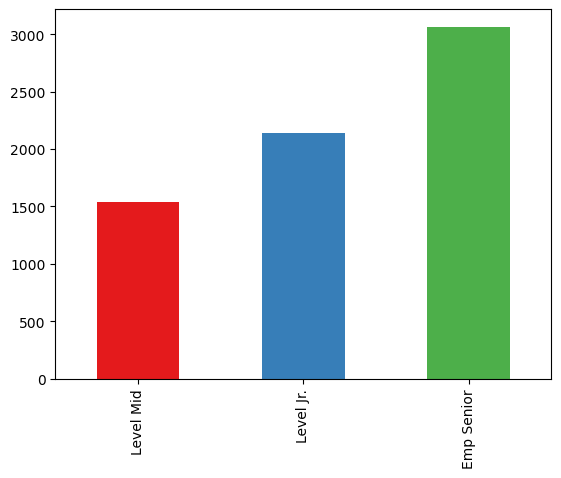

In [22]:
train_data['Employment History'].value_counts().sort_values(ascending = True).plot.bar(color = plt.cm.Set1(range(len(train_data['Employment History']))));

In [23]:
train_data = train_data.join(pd.get_dummies(train_data['Employment History']))

test_data = test_data.join(pd.get_dummies(test_data['Employment History']))

In [24]:
train_data.drop(columns = ['Employment History'], inplace = True)

test_data.drop(columns = ['Employment History'], inplace = True)

Теперь посмотрим признак Credit Score. При вызове метода describe, среднее значение показывает 1147, что кажется не правильным, так как диапазон кредитного рейтинга от 580 до 900. У нас максимальное значение показывает больше 7 тысяч баллов, что больше кажется, что эти строки были помножены на 10.

In [25]:
train_data[train_data['Credit Score'] > 900]

Home Ownership  Annual Income  Tax Liens  Number of Open Accounts  \
5          Own Home       972420.0        0.0                     14.0   
48    Home Mortgage      2210574.0        0.0                     14.0   
81    Home Mortgage      1452227.0        0.0                     10.0   
83    Home Mortgage       699523.0        0.0                      7.0   
111   Home Mortgage      2396375.0        0.0                      9.0   
...             ...            ...        ...                      ...   
6694  Home Mortgage      1442385.0        0.0                     15.0   
6698       Own Home       668876.0        0.0                     33.0   
6704           Rent      1345162.0        0.0                     13.0   
6705  Home Mortgage       820895.0        0.0                     17.0   
6721           Rent       842004.0        0.0                     14.0   

      Years of Credit History  Maximum Open Credit  Number of Credit Problems  \
5                        19.4             380556.0                        0.0   
48                       24.2             747406.0                        0.0   
81                       12.8             416900.0                        0.0   
83                       12.2             344146.0                        0.0   
111                      10.5             335280.0                        1.0   
...                       ...                  ...                        ...   
6694                     23.6             378708.0                        1.0   
6698                     11.9             759704.0                        0.0   
6704                     10.5             730048.0                        0.0   
6705                     13.9             548394.0                        0.0   
6721                     13.0             197120.0                        0.0   

      Months since last delinquent  Bankruptcies             Purpose  \
5                              NaN           0.0  debt consolidation   
48                            22.0           0.0  debt consolidation   
81                             NaN           0.0  debt consolidation   
83                             NaN           0.0               other   
111                            8.0           1.0  debt consolidation   
...                            ...           ...                 ...   
6694                           NaN           1.0  debt consolidation   
6698                           NaN           0.0  debt consolidation   
6704                          14.0           0.0               other   
6705                           NaN           0.0  debt consolidation   
6721                          41.0           0.0  debt consolidation   

            Term  Current Loan Amount  Current Credit Balance  Monthly Debt  \
5     Short Term             247720.0                237956.0       16531.0   
48    Short Term             667722.0                310479.0       38501.0   
81     Long Term             538076.0                256006.0       30497.0   
83     Long Term             289674.0                129580.0       13874.0   
111   Short Term             621544.0                139859.0       33350.0   
...          ...                  ...                     ...           ...   
6694   Long Term             393030.0                136059.0       11659.0   
6698   Long Term             311960.0                362159.0       12374.0   
6704   Long Term             529562.0                308940.0        6479.0   
6705  Short Term             223124.0                214548.0       10398.0   
6721  Short Term             173316.0                144020.0       13753.0   

      Credit Score  Credit Default  Emp Senior  Level Jr.  Level Mid  
5           7270.0               1           0          0          1  
48          7300.0               1           1          0          0  
81          6600.0               1           0          0          1  
83          7000.0               1           

Как мы видим, 357 строк имеют неправильные данные. Исправим это, разделив эти значения на 10

In [26]:
train_data['Credit Score'] = train_data['Credit Score'].apply(lambda value: value / 10 if value > 900 else value)

test_data['Credit Score'] = test_data['Credit Score'].apply(lambda value: value / 10 if value > 900 else value)

train_data[train_data['Credit Score'] > 900]

Empty DataFrame
Columns: [Home Ownership, Annual Income, Tax Liens, Number of Open Accounts, Years of Credit History, Maximum Open Credit, Number of Credit Problems, Months since last delinquent, Bankruptcies, Purpose, Term, Current Loan Amount, Current Credit Balance, Monthly Debt, Credit Score, Credit Default, Emp Senior, Level Jr., Level Mid]
Index: []

Для того чтобы заполнить отсутствующие строки в столбце Credit Score, нам для начала нужно перевести признак Term из строки в числовые значения. Есть два типа срока кредита: долгосрочный и краткосрочный. Для каждого из сроков, как правило, есть свой диапазон кредитного рейтинга, и заполнять одинаковым средним значением для двух сроков нецелесообразно.

In [27]:
train_data['Term'].replace(('Short Term', 'Long Term'),(0, 1), inplace = True)

test_data['Term'].replace(('Short Term', 'Long Term'),(0, 1), inplace = True)

train_data

Home Ownership  Annual Income  Tax Liens  Number of Open Accounts  \
0     Home Mortgage      1170913.0        0.0                     10.0   
1              Rent       767904.0        0.0                      9.0   
2          Own Home      1170913.0        0.0                     14.0   
3     Home Mortgage      1267395.0        0.0                     11.0   
4              Rent      1813493.0        0.0                     19.0   
...             ...            ...        ...                      ...   
6745  Home Mortgage       840902.0        0.0                      9.0   
6746  Home Mortgage      1170913.0        0.0                      8.0   
6747  Home Mortgage      1414892.0        0.0                     28.0   
6748  Home Mortgage      1896333.0        0.0                      7.0   
6749       Own Home      1170913.0        0.0                     25.0   

      Years of Credit History  Maximum Open Credit  Number of Credit Problems  \
0                        21.8             267762.0                        0.0   
1                        15.4             275528.0                        0.0   
2                        27.1            1635590.0                        1.0   
3                        11.8             137676.0                        1.0   
4                        14.0             501556.0                        0.0   
...                       ...                  ...                        ...   
6745                     21.3             543268.0                        0.0   
6746                     11.1             649462.0                        0.0   
6747                     15.2            1240426.0                        0.0   
6748                     12.9             544632.0                        0.0   
6749                     27.8             925650.0                        0.0   

      Months since last delinquent  Bankruptcies             Purpose  Term  \
0                              NaN           0.0  debt consolidation     0   
1                             73.0           0.0  debt consolidation     0   
2                              NaN           0.0  debt consolidation     0   
3                             61.0           0.0   home improvements     0   
4                              6.0           0.0  debt consolidation     0   
...                            ...           ...                 ...   ...   
6745                          25.0           0.0  debt consolidation     1   
6746                           NaN           0.0  debt consolidation     0   
6747                           NaN           0.0  debt consolidation     0   
6748                           NaN           0.0  debt consolidation     1   
6749                          33.0           0.0       medical bills     0   

      Current Loan Amount  Current Credit Balance  Monthly Debt  Credit Score  \
0                193358.0                140372.0       19404.0           NaN   
1                222288.0                168226.0       18302.0         718.0   
2                433268.0               1017032.0       15295.0           NaN   
3              99999999.0                 34124.0       25559.0         719.0   
4                265232.0                114779.0       23877.0         713.0   
...                   ...                     ...           ...           ...   
6745             227722.0                436810.0       20041.0         670.0   
6746             321750.0                288857.0        7100.0           NaN   
6747           99999999.0                325660.0       33839.0         738.0   
6748             516648.0                408747.0       23072.0         719.0   
6749             220924.0                396511.0       20180.0           NaN   

      Credit Default  Emp Senior  Level Jr.  Level Mid  
0                  0           1          0          0  
1                  0           0          1          0  
2                  0           1          0          0  
3    

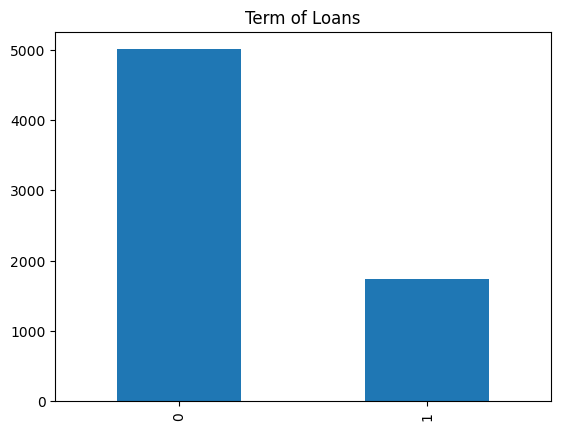

In [28]:
train_data['Term'].value_counts().plot.bar(title="Term of Loans");

Количество краткосрочных кредитов превосходит в разы долгосрочные

In [29]:
short_term_data = train_data[train_data['Term'] == 0]
short_term_mean = short_term_data['Credit Score'].mean()

short_term_test_data = test_data[test_data['Term'] == 0]
short_term_test_mean = short_term_test_data['Credit Score'].mean()

short_term_mean

728.1519245475401

In [30]:
long_term_data = train_data[train_data['Term'] == 1]
long_term_mean = long_term_data['Credit Score'].mean()

long_term_test_data = test_data[test_data['Term'] == 1]
long_term_test_mean = long_term_test_data['Credit Score'].mean()

long_term_mean

698.146461107218

In [31]:
train_data.loc[train_data['Term'] == 0, 'Credit Score'] = train_data[train_data['Term'] == 0]['Credit Score'].fillna(short_term_mean)

test_data.loc[test_data['Term'] == 0, 'Credit Score'] = test_data[test_data['Term'] == 0]['Credit Score'].fillna(short_term_test_mean)

In [32]:
train_data.loc[train_data['Term'] == 1, 'Credit Score'] = train_data[train_data['Term'] == 1]['Credit Score'].fillna(long_term_mean)

test_data.loc[test_data['Term'] == 1, 'Credit Score'] = test_data[test_data['Term'] == 1]['Credit Score'].fillna(long_term_test_mean)

Так как кредитный рейтинг имеет свои диапазоны, а у нас идут непрерывные значения, то нужно создать на основе рейтинга категории

In [33]:
bins = [0, 580, 670, 740, 800, 850]
labels = ['Poor', 'Average', 'Good', 'Very Good', 'Exceptional']

train_data['Credit Score'] = pd.cut(train_data['Credit Score'], bins = bins, labels = labels, include_lowest = True)

test_data['Credit Score'] = pd.cut(test_data['Credit Score'], bins = bins, labels = labels, include_lowest = True)

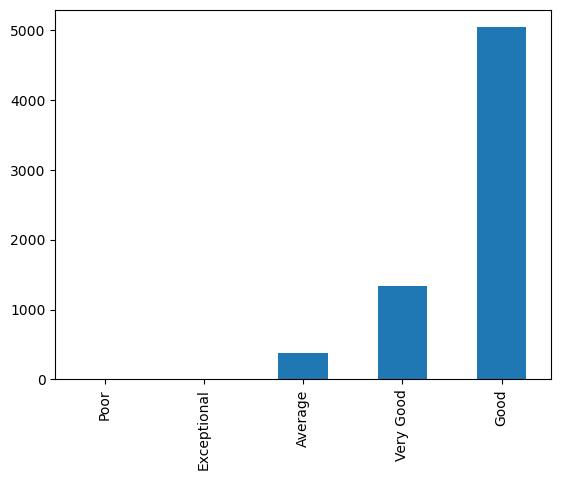

In [34]:
train_data['Credit Score'].value_counts().sort_values(ascending = True).plot.bar(plt.cm.Set2(range(len(train_data['Credit Score']))));

Переводим Credit Score в категориальные данные

In [35]:
train_data = train_data.join(pd.get_dummies(train_data['Credit Score']))

test_data = test_data.join(pd.get_dummies(test_data['Credit Score']))

In [36]:
train_data

Home Ownership  Annual Income  Tax Liens  Number of Open Accounts  \
0     Home Mortgage      1170913.0        0.0                     10.0   
1              Rent       767904.0        0.0                      9.0   
2          Own Home      1170913.0        0.0                     14.0   
3     Home Mortgage      1267395.0        0.0                     11.0   
4              Rent      1813493.0        0.0                     19.0   
...             ...            ...        ...                      ...   
6745  Home Mortgage       840902.0        0.0                      9.0   
6746  Home Mortgage      1170913.0        0.0                      8.0   
6747  Home Mortgage      1414892.0        0.0                     28.0   
6748  Home Mortgage      1896333.0        0.0                      7.0   
6749       Own Home      1170913.0        0.0                     25.0   

      Years of Credit History  Maximum Open Credit  Number of Credit Problems  \
0                        21.8             267762.0                        0.0   
1                        15.4             275528.0                        0.0   
2                        27.1            1635590.0                        1.0   
3                        11.8             137676.0                        1.0   
4                        14.0             501556.0                        0.0   
...                       ...                  ...                        ...   
6745                     21.3             543268.0                        0.0   
6746                     11.1             649462.0                        0.0   
6747                     15.2            1240426.0                        0.0   
6748                     12.9             544632.0                        0.0   
6749                     27.8             925650.0                        0.0   

      Months since last delinquent  Bankruptcies             Purpose  ...  \
0                              NaN           0.0  debt consolidation  ...   
1                             73.0           0.0  debt consolidation  ...   
2                              NaN           0.0  debt consolidation  ...   
3                             61.0           0.0   home improvements  ...   
4                              6.0           0.0  debt consolidation  ...   
...                            ...           ...                 ...  ...   
6745                          25.0           0.0  debt consolidation  ...   
6746                           NaN           0.0  debt consolidation  ...   
6747                           NaN           0.0  debt consolidation  ...   
6748                           NaN           0.0  debt consolidation  ...   
6749                          33.0           0.0       medical bills  ...   

      Credit Score  Credit Default  Emp Senior  Level Jr. Level Mid  Poor  \
0             Good               0           1          0         0     0   
1             Good               0           0          1         0     0   
2             Good               0           1          0         0     0   
3             Good               0           0          1         0     0   
4             Good               0           0          0         1     0   
...            ...             ...         ...        ...       ...   ...   
6745       Average               0           0          1         0     0   
6746          Good               0           1          0         0     0   
6747          Good               0           1          0         0     0   
6748          Good               0           0          1         0     0   
6749          Good               0           0          0         1     0   

      Average  Good  Very Good  Exceptional  
0           0     1          0            0  
1           0     1          0            0  
2           0     1          0            0  
3           0     1          0            0  
4           0     1          0            0  
...       ...   .

In [37]:
train_data[train_data['Exceptional'] == 1]

Empty DataFrame
Columns: [Home Ownership, Annual Income, Tax Liens, Number of Open Accounts, Years of Credit History, Maximum Open Credit, Number of Credit Problems, Months since last delinquent, Bankruptcies, Purpose, Term, Current Loan Amount, Current Credit Balance, Monthly Debt, Credit Score, Credit Default, Emp Senior, Level Jr., Level Mid, Poor, Average, Good, Very Good, Exceptional]
Index: []

[0 rows x 24 columns]

Так как колонка Exceptional не имеет ни одного положительного значения, уберём его. Также удалим столбец Credit Score.

In [38]:
train_data.drop(columns = ['Exceptional', 'Credit Score'], inplace = True)

test_data.drop(columns = ['Exceptional', 'Credit Score'], inplace = True)

In [39]:
train_data

Home Ownership  Annual Income  Tax Liens  Number of Open Accounts  \
0     Home Mortgage      1170913.0        0.0                     10.0   
1              Rent       767904.0        0.0                      9.0   
2          Own Home      1170913.0        0.0                     14.0   
3     Home Mortgage      1267395.0        0.0                     11.0   
4              Rent      1813493.0        0.0                     19.0   
...             ...            ...        ...                      ...   
6745  Home Mortgage       840902.0        0.0                      9.0   
6746  Home Mortgage      1170913.0        0.0                      8.0   
6747  Home Mortgage      1414892.0        0.0                     28.0   
6748  Home Mortgage      1896333.0        0.0                      7.0   
6749       Own Home      1170913.0        0.0                     25.0   

      Years of Credit History  Maximum Open Credit  Number of Credit Problems  \
0                        21.8             267762.0                        0.0   
1                        15.4             275528.0                        0.0   
2                        27.1            1635590.0                        1.0   
3                        11.8             137676.0                        1.0   
4                        14.0             501556.0                        0.0   
...                       ...                  ...                        ...   
6745                     21.3             543268.0                        0.0   
6746                     11.1             649462.0                        0.0   
6747                     15.2            1240426.0                        0.0   
6748                     12.9             544632.0                        0.0   
6749                     27.8             925650.0                        0.0   

      Months since last delinquent  Bankruptcies             Purpose  ...  \
0                              NaN           0.0  debt consolidation  ...   
1                             73.0           0.0  debt consolidation  ...   
2                              NaN           0.0  debt consolidation  ...   
3                             61.0           0.0   home improvements  ...   
4                              6.0           0.0  debt consolidation  ...   
...                            ...           ...                 ...  ...   
6745                          25.0           0.0  debt consolidation  ...   
6746                           NaN           0.0  debt consolidation  ...   
6747                           NaN           0.0  debt consolidation  ...   
6748                           NaN           0.0  debt consolidation  ...   
6749                          33.0           0.0       medical bills  ...   

      Current Credit Balance  Monthly Debt  Credit Default  Emp Senior  \
0                   140372.0       19404.0               0           1   
1                   168226.0       18302.0               0           0   
2                  1017032.0       15295.0               0           1   
3                    34124.0       25559.0               0           0   
4                   114779.0       23877.0               0           0   
...                      ...           ...             ...         ...   
6745                436810.0       20041.0               0           0   
6746                288857.0        7100.0               0           1   
6747                325660.0       33839.0               0           1   
6748                408747.0       23072.0               0           0   
6749                396511.0       20180.0               0           0   

      Level Jr.  Level Mid  Poor  Average  Good  Very Good  
0             0          0     0        0     1          0  
1             1          0     0        0     1          0  
2             0          0     0        0     1          0  
3             1          0     0        0     1          0  
4             0         

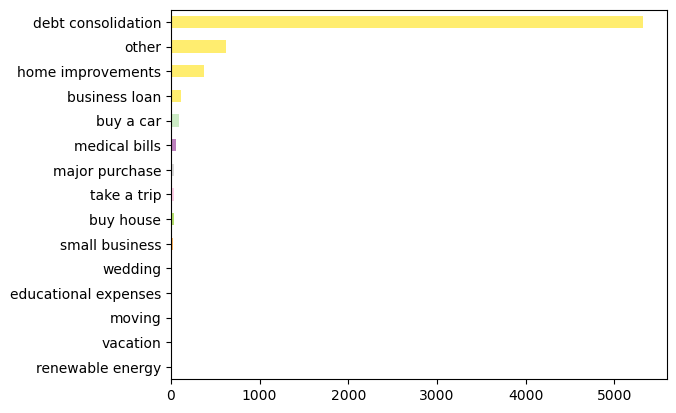

In [40]:
train_data['Purpose'].value_counts().sort_values(ascending = True).plot.barh(color = plt.cm.Set3(range(len(train_data['Purpose']))));

In [41]:
purpose_loan_status = train_data[['Purpose','Credit Default']]

purpose_loan_status.head()

Purpose  Credit Default
0  debt consolidation               0
1  debt consolidation               0
2  debt consolidation               0
3   home improvements               0
4  debt consolidation               0

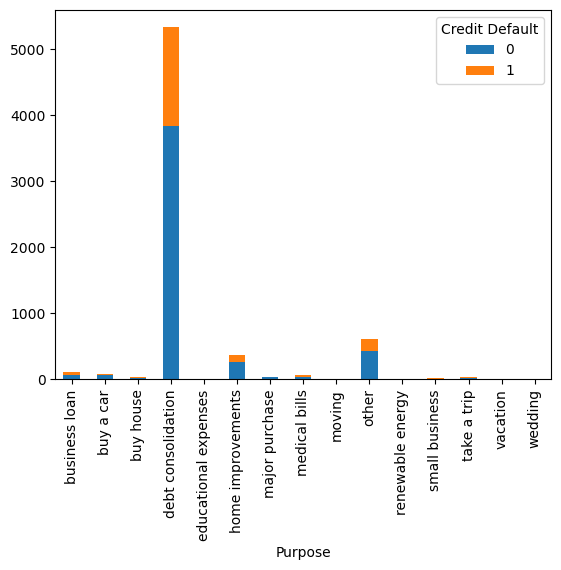

In [42]:
pd.crosstab(purpose_loan_status['Purpose'], purpose_loan_status['Credit Default']).plot.bar(stacked = True);

Данный график показывает, на что давалось одобрение кредита

In [43]:
train_data['Home Ownership'].value_counts()

Home Mortgage    3279
Rent             2882
Own Home          579
Have Mortgage      10
Name: Home Ownership, dtype: int64

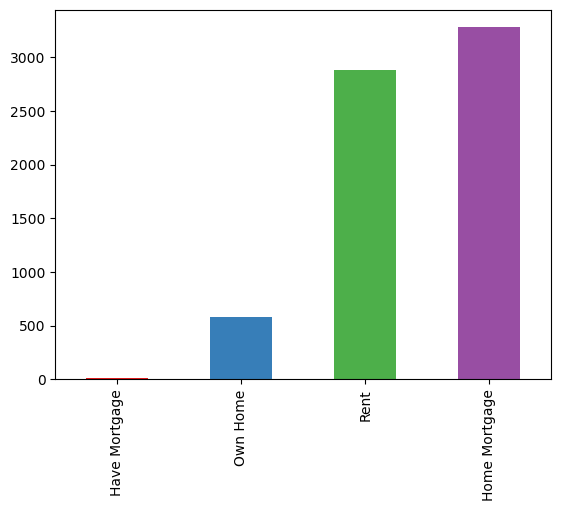

In [44]:
train_data['Home Ownership'].value_counts().sort_values(ascending = True).plot.bar(color = plt.cm.Set1(range(len(train_data['Home Ownership']))));

Как мы видим, большинство кредитов было выдано людям имеющим ипотеку на дом, либо людям, снимающим жилье

In [45]:
train_data = train_data.join(pd.get_dummies(train_data['Home Ownership']))

test_data = test_data.join(pd.get_dummies(test_data['Home Ownership']))

In [46]:
train_data.drop(columns = ['Home Ownership'], inplace = True)

test_data.drop(columns = ['Home Ownership'], inplace = True)

train_data

Annual Income  Tax Liens  Number of Open Accounts  \
0         1170913.0        0.0                     10.0   
1          767904.0        0.0                      9.0   
2         1170913.0        0.0                     14.0   
3         1267395.0        0.0                     11.0   
4         1813493.0        0.0                     19.0   
...             ...        ...                      ...   
6745       840902.0        0.0                      9.0   
6746      1170913.0        0.0                      8.0   
6747      1414892.0        0.0                     28.0   
6748      1896333.0        0.0                      7.0   
6749      1170913.0        0.0                     25.0   

      Years of Credit History  Maximum Open Credit  Number of Credit Problems  \
0                        21.8             267762.0                        0.0   
1                        15.4             275528.0                        0.0   
2                        27.1            1635590.0                        1.0   
3                        11.8             137676.0                        1.0   
4                        14.0             501556.0                        0.0   
...                       ...                  ...                        ...   
6745                     21.3             543268.0                        0.0   
6746                     11.1             649462.0                        0.0   
6747                     15.2            1240426.0                        0.0   
6748                     12.9             544632.0                        0.0   
6749                     27.8             925650.0                        0.0   

      Months since last delinquent  Bankruptcies             Purpose  Term  \
0                              NaN           0.0  debt consolidation     0   
1                             73.0           0.0  debt consolidation     0   
2                              NaN           0.0  debt consolidation     0   
3                             61.0           0.0   home improvements     0   
4                              6.0           0.0  debt consolidation     0   
...                            ...           ...                 ...   ...   
6745                          25.0           0.0  debt consolidation     1   
6746                           NaN           0.0  debt consolidation     0   
6747                           NaN           0.0  debt consolidation     0   
6748                           NaN           0.0  debt consolidation     1   
6749                          33.0           0.0       medical bills     0   

      ...  Level Jr.  Level Mid  Poor  Average  Good  Very Good  \
0     ...          0          0     0        0     1          0   
1     ...          1          0     0        0     1          0   
2     ...          0          0     0        0     1          0   
3     ...          1          0     0        0     1          0   
4     ...          0          1     0        0     1          0   
...   ...        ...        ...   ...      ...   ...        ...   
6745  ...          1          0     0        1     0          0   
6746  ...          0          0     0        0     1          0   
6747  ...          0          0     0        0     1          0   
6748  ...          1          0     0        0     1          0   
6749  ...          0          1     0        0     1          0   

      Have Mortgage  Home Mortgage  Own Home  Rent  
0                 0              1         0     0  
1                 0              0         0     1  
2                 0              0         1     0  
3                 0              1         0     0  
4                 0              0         0     1  
...             ...            ...       ...   ...  
6745              0              1         0     0  
6746              0              1         0     0  
6747              0              1         0     0  
6748              0              1         0     0  

Для нашей модели столбец Purpose носит информационный характер, и не так сильно влияет на предсказание. Хотя в некоторых случаях цель будет являться ключевым фактором для одобрения кредита, но в нашем случае мы удалим его.

In [47]:
train_data.drop(columns = ['Purpose'], inplace = True)

test_data.drop(columns = ['Purpose'], inplace = True)

In [48]:
train_data.head()

Annual Income  Tax Liens  Number of Open Accounts  Years of Credit History  \
0      1170913.0        0.0                     10.0                     21.8   
1       767904.0        0.0                      9.0                     15.4   
2      1170913.0        0.0                     14.0                     27.1   
3      1267395.0        0.0                     11.0                     11.8   
4      1813493.0        0.0                     19.0                     14.0   

   Maximum Open Credit  Number of Credit Problems  \
0             267762.0                        0.0   
1             275528.0                        0.0   
2            1635590.0                        1.0   
3             137676.0                        1.0   
4             501556.0                        0.0   

   Months since last delinquent  Bankruptcies  Term  Current Loan Amount  ...  \
0                           NaN           0.0     0             193358.0  ...   
1                          73.0           0.0     0             222288.0  ...   
2                           NaN           0.0     0             433268.0  ...   
3                          61.0           0.0     0           99999999.0  ...   
4                           6.0           0.0     0             265232.0  ...   

   Level Jr.  Level Mid  Poor  Average  Good  Very Good  Have Mortgage  \
0          0          0     0        0     1          0              0   
1          1          0     0        0     1          0              0   
2          0          0     0        0     1          0              0   
3          1          0     0        0     1          0              0   
4          0          1     0        0     1          0              0   

   Home Mortgage  Own Home  Rent  
0              1         0     0  
1              0         0     1  
2              0         1     0  
3              1         0     0  
4              0         0     1  

[5 rows x 24 columns]

Далее рассмотрим Number of Credit Problems.

In [49]:
train_data['Number of Credit Problems'].value_counts()

0.0    5819
1.0     800
2.0      82
3.0      31
4.0       7
5.0       6
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

Мы разделим признак на три категории, где 0 будет означать что проблемы нет, от 1 до 5 проблема незначительная, и более 5 серьезные кредитные проблемы.

In [50]:
train_data['Credit Problems'] = train_data['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x == 0 else ("Some Credit promblem" if x > 0 and x < 5 else "Major Credit Problems"))

test_data['Credit Problems'] = test_data['Number of Credit Problems'].apply(lambda x: "No Credit Problem" if x == 0 else ("Some Credit promblem" if x > 0 and x < 5 else "Major Credit Problems"))

In [51]:
train_data['Credit Problems'].value_counts()

No Credit Problem        5819
Some Credit promblem      920
Major Credit Problems      11
Name: Credit Problems, dtype: int64

<AxesSubplot:>

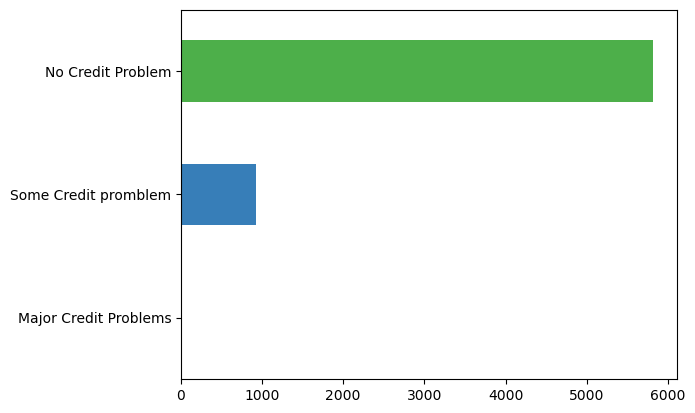

In [52]:
train_data['Credit Problems'].value_counts().sort_values(ascending=True).plot.barh(color = plt.cm.Set1(range(len(train_data['Credit Problems']))))

Глядя на приведенный график, можно предположить, что кредиты, как правило, не выдаются людям, имеющим проблемы с кредитованием.

Далее мы преобразуем кредитные проблемы в дискретные переменные.

In [53]:
train_data = train_data.join(pd.get_dummies(train_data['Credit Problems']))

test_data = test_data.join(pd.get_dummies(test_data['Credit Problems']))

In [54]:
train_data = train_data.drop(['Credit Problems','Number of Credit Problems'], axis = 1)

test_data = test_data.drop(['Credit Problems','Number of Credit Problems'], axis = 1)

train_data.head()

Annual Income  Tax Liens  Number of Open Accounts  Years of Credit History  \
0      1170913.0        0.0                     10.0                     21.8   
1       767904.0        0.0                      9.0                     15.4   
2      1170913.0        0.0                     14.0                     27.1   
3      1267395.0        0.0                     11.0                     11.8   
4      1813493.0        0.0                     19.0                     14.0   

   Maximum Open Credit  Months since last delinquent  Bankruptcies  Term  \
0             267762.0                           NaN           0.0     0   
1             275528.0                          73.0           0.0     0   
2            1635590.0                           NaN           0.0     0   
3             137676.0                          61.0           0.0     0   
4             501556.0                           6.0           0.0     0   

   Current Loan Amount  Current Credit Balance  ...  Average  Good  Very Good  \
0             193358.0                140372.0  ...        0     1          0   
1             222288.0                168226.0  ...        0     1          0   
2             433268.0               1017032.0  ...        0     1          0   
3           99999999.0                 34124.0  ...        0     1          0   
4             265232.0                114779.0  ...        0     1          0   

   Have Mortgage  Home Mortgage  Own Home  Rent  Major Credit Problems  \
0              0              1         0     0                      0   
1              0              0         0     1                      0   
2              0              0         1     0                      0   
3              0              1         0     0                      0   
4              0              0         0     1                      0   

   No Credit Problem  Some Credit promblem  
0                  1                     0  
1                  1                     0  
2                  0                     1  
3                  0                     1  
4                  1                     0  

[5 rows x 26 columns]

Одним из немаловажных признаков является Years of credit history. Классифицируем их 3 категориями. Если кредитной истории меньше 5 лет то это короткий кредитный возраст, если от 5 до 17 то хороший кредитный возраст, а если больше 17 то исключительный.

In [55]:
train_data['Credit Age'] = train_data['Years of Credit History'].apply(lambda x: "Short Credit Age" if x < 5 else ("Good Credit Age" if x > 5 and x < 17 else "Exceptional Credit Age"))

test_data['Credit Age'] = test_data['Years of Credit History'].apply(lambda x: "Short Credit Age" if x < 5 else ("Good Credit Age" if x > 5 and x < 17 else "Exceptional Credit Age"))

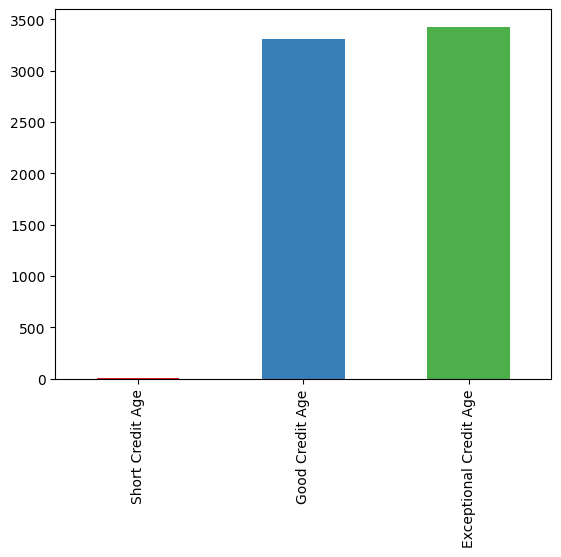

In [56]:
train_data['Credit Age'].value_counts().sort_values(ascending=True).plot.bar(color = plt.cm.Set1(range(len(train_data['Credit Age']))));

In [57]:
train_data = train_data.join(pd.get_dummies(train_data['Credit Age']))
train_data.drop(columns = ['Short Credit Age'], inplace = True)

test_data = test_data.join(pd.get_dummies(test_data['Credit Age']))

In [58]:
train_data.drop(columns = ['Credit Age','Years of Credit History'], inplace = True)

test_data.drop(columns = ['Credit Age','Years of Credit History'], inplace = True)

train_data.head()

Annual Income  Tax Liens  Number of Open Accounts  Maximum Open Credit  \
0      1170913.0        0.0                     10.0             267762.0   
1       767904.0        0.0                      9.0             275528.0   
2      1170913.0        0.0                     14.0            1635590.0   
3      1267395.0        0.0                     11.0             137676.0   
4      1813493.0        0.0                     19.0             501556.0   

   Months since last delinquent  Bankruptcies  Term  Current Loan Amount  \
0                           NaN           0.0     0             193358.0   
1                          73.0           0.0     0             222288.0   
2                           NaN           0.0     0             433268.0   
3                          61.0           0.0     0           99999999.0   
4                           6.0           0.0     0             265232.0   

   Current Credit Balance  Monthly Debt  ...  Very Good  Have Mortgage  \
0                140372.0       19404.0  ...          0              0   
1                168226.0       18302.0  ...          0              0   
2               1017032.0       15295.0  ...          0              0   
3                 34124.0       25559.0  ...          0              0   
4                114779.0       23877.0  ...          0              0   

   Home Mortgage  Own Home  Rent  Major Credit Problems  No Credit Problem  \
0              1         0     0                      0                  1   
1              0         0     1                      0                  1   
2              0         1     0                      0                  0   
3              1         0     0                      0                  0   
4              0         0     1                      0                  1   

   Some Credit promblem  Exceptional Credit Age  Good Credit Age  
0                     0                       1                0  
1                     0                       0                1  
2                     1                       1                0  
3                     1                       0                1  
4                     0                       0                1  

[5 rows x 27 columns]

In [59]:
test_data.head()

Annual Income  Tax Liens  Number of Open Accounts  Maximum Open Credit  \
0      1886510.0        0.0                     13.0             552398.0   
1       869877.0        0.0                     16.0             657690.0   
2      1157974.0        0.0                     13.0             638704.0   
3      1125142.0        0.0                     17.0             570548.0   
4      1060998.0        0.0                      7.0             379764.0   

   Months since last delinquent  Bankruptcies  Term  Current Loan Amount  \
0                           NaN           0.0     0             595782.0   
1                           NaN           0.0     1             501380.0   
2                           NaN           0.0     0             238150.0   
3                           NaN           0.0     1             393096.0   
4                          27.0           0.0     0             268048.0   

   Current Credit Balance  Monthly Debt  ...  Very Good  Have Mortgage  \
0                155059.0       26097.0  ...          0              0   
1                259008.0       19645.0  ...          0              0   
2                424745.0       28795.0  ...          0              0   
3                284810.0       22597.0  ...          0              0   
4                188252.0        5438.0  ...          0              0   

   Home Mortgage  Own Home  Rent  Major Credit Problems  No Credit Problem  \
0              1         0     0                      0                  1   
1              0         0     1                      0                  1   
2              1         0     0                      0                  1   
3              1         0     0                      0                  1   
4              1         0     0                      0                  1   

   Some Credit promblem  Exceptional Credit Age  Good Credit Age  
0                     0                       1                0  
1                     0                       0                1  
2                     0                       0                1  
3                     0                       0                1  
4                     0                       1                0  

[5 rows x 27 columns]

Мы предполагаем, что некоторые столбцы в нашем наборе данных коррелируют друг с другом, поэтому мы хотим уменьшить количество признаков. Например, у нас есть кредитный рейтинг и различные показатели, связанные с кредитованием, такие как максимальная сумма кредита, текущий баланс и т.д. Предполагая, что эти показатели уже содержат информацию о кредитном рейтинге, мы можем удалить некоторые из этих столбцов из нашего набора данных.

In [60]:
train_data = train_data.drop(['Months since last delinquent', 'Number of Open Accounts', 'Maximum Open Credit',
                             'Current Credit Balance', 'Monthly Debt'], axis = 1)

test_data = test_data.drop(['Months since last delinquent', 'Number of Open Accounts', 'Maximum Open Credit',
                             'Current Credit Balance', 'Monthly Debt'], axis = 1)

Теперь нужно изучить признак Tax Liens.

In [61]:
train_data['Tax Liens'].value_counts()

0.0    6631
1.0      76
2.0      26
3.0       7
4.0       5
6.0       2
5.0       2
7.0       1
Name: Tax Liens, dtype: int64

Налоговые обременения можно разделить на 3 категории. Если tax liens равен 0, то No tax liens, если от 0 до 3 Some tax liens, От 3 и выше Many tax liens.

In [62]:
train_data['Tax Liens'] = train_data['Tax Liens'].apply(lambda x: "No Tax Lien" if x == 0 else ("Some Tax Liens" if x > 0 and x < 3 else "Many Tax Liens"))

test_data['Tax Liens'] = test_data['Tax Liens'].apply(lambda x: "No Tax Lien" if x == 0 else ("Some Tax Liens" if x > 0 and x < 3 else "Many Tax Liens"))

In [63]:
train_data = train_data.join(pd.get_dummies(train_data['Tax Liens']))

test_data = test_data.join(pd.get_dummies(test_data['Tax Liens']))

In [64]:
train_data.drop(columns = ['Tax Liens'], inplace = True)

test_data.drop(columns = ['Tax Liens'], inplace = True)

train_data.head()

Annual Income  Bankruptcies  Term  Current Loan Amount  Credit Default  \
0      1170913.0           0.0     0             193358.0               0   
1       767904.0           0.0     0             222288.0               0   
2      1170913.0           0.0     0             433268.0               0   
3      1267395.0           0.0     0           99999999.0               0   
4      1813493.0           0.0     0             265232.0               0   

   Emp Senior  Level Jr.  Level Mid  Poor  Average  ...  Own Home  Rent  \
0           1          0          0     0        0  ...         0     0   
1           0          1          0     0        0  ...         0     1   
2           1          0          0     0        0  ...         1     0   
3           0          1          0     0        0  ...         0     0   
4           0          0          1     0        0  ...         0     1   

   Major Credit Problems  No Credit Problem  Some Credit promblem  \
0                      0                  1                     0   
1                      0                  1                     0   
2                      0                  0                     1   
3                      0                  0                     1   
4                      0                  1                     0   

   Exceptional Credit Age  Good Credit Age  Many Tax Liens  No Tax Lien  \
0                       1                0               0            1   
1                       0                1               0            1   
2                       1                0               0            1   
3                       0                1               0            1   
4                       0                1               0            1   

   Some Tax Liens  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 24 columns]

Следующий признак - это Bankruptcies.

In [65]:
train_data['Bankruptcies'].value_counts()

0.0    5987
1.0     713
2.0      30
3.0       7
4.0       1
Name: Bankruptcies, dtype: int64

In [66]:
train_data['Bankruptcies'].isnull().sum()

12

Заполним пустые строки модой.

In [67]:
train_data['Bankruptcies'].fillna(train_data['Bankruptcies'].mode()[0], inplace = True)

test_data['Bankruptcies'].fillna(test_data['Bankruptcies'].mode()[0], inplace = True)

In [68]:
train_data['Bankruptcies'].isnull().sum()

0

Теперь также поделим признак на 3 категории

In [69]:
train_data['Bankruptcies'] = train_data['Bankruptcies'].apply(lambda x: "No bankruptcies" if x == 0 else ("Some Bankruptcies" if x > 0 and x < 3 else "Many Bankruptcies"))

test_data['Bankruptcies'] = test_data['Bankruptcies'].apply(lambda x: "No bankruptcies" if x == 0 else ("Some Bankruptcies" if x > 0 and x < 3 else "Many Bankruptcies"))

In [70]:
train_data = train_data.join(pd.get_dummies(train_data['Bankruptcies']))

test_data = test_data.join(pd.get_dummies(test_data['Bankruptcies']))

In [71]:
train_data.drop(columns = ['Bankruptcies'], inplace = True)

test_data.drop(columns = ['Bankruptcies'], inplace = True)

train_data.head()

Annual Income  Term  Current Loan Amount  Credit Default  Emp Senior  \
0      1170913.0     0             193358.0               0           1   
1       767904.0     0             222288.0               0           0   
2      1170913.0     0             433268.0               0           1   
3      1267395.0     0           99999999.0               0           0   
4      1813493.0     0             265232.0               0           0   

   Level Jr.  Level Mid  Poor  Average  Good  ...  No Credit Problem  \
0          0          0     0        0     1  ...                  1   
1          1          0     0        0     1  ...                  1   
2          0          0     0        0     1  ...                  0   
3          1          0     0        0     1  ...                  0   
4          0          1     0        0     1  ...                  1   

   Some Credit promblem  Exceptional Credit Age  Good Credit Age  \
0                     0                       1                0   
1                     0                       0                1   
2                     1                       1                0   
3                     1                       0                1   
4                     0                       0                1   

   Many Tax Liens  No Tax Lien  Some Tax Liens  Many Bankruptcies  \
0               0            1               0                  0   
1               0            1               0                  0   
2               0            1               0                  0   
3               0            1               0                  0   
4               0            1               0                  0   

   No bankruptcies  Some Bankruptcies  
0                1                  0  
1                1                  0  
2                1                  0  
3                1                  0  
4                1                  0  

[5 rows x 26 columns]

Нужно преобразовать годовой доход и общую сумму займа в дискретные переменные. 
Мы предполагаем, что: 

Среднее значение - стандартное отклонение = нижняя граница низкого дохода 

Среднее значение + стандартное отклонение = верхняя граница высокого дохода, и аналогично для суммы займа.

In [72]:
mean_outlier = train_data[train_data['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
std_dev_outlier = train_data[train_data['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline = mean_outlier -  std_dev_outlier
richline = mean_outlier + std_dev_outlier

In [73]:
mean_outlier_test = test_data[test_data['Annual Income'] < 99999999.00 ]['Annual Income'].mean()
std_dev_outlier_test = test_data[test_data['Annual Income'] < 99999999.00 ]['Annual Income'].std()
poorline_test = mean_outlier_test -  std_dev_outlier_test
richline_test = mean_outlier_test + std_dev_outlier_test

In [74]:
train_data['Annual Income'] = train_data['Annual Income'].apply(lambda x: "Low Income" if x <= poorline else ("Average Income" if x > poorline and x < richline else "High Income"))

test_data['Annual Income'] = test_data['Annual Income'].apply(lambda x: "Low Income" if x <= poorline_test else ("Average Income" if x > poorline_test and x < richline_test else "High Income"))

In [75]:
train_data = train_data.join(pd.get_dummies(train_data['Annual Income']))

test_data = test_data.join(pd.get_dummies(test_data['Annual Income']))

In [76]:
train_data = train_data.drop(['Annual Income'], axis=1)

test_data = test_data.drop(['Annual Income'], axis=1)

train_data.head()

Term  Current Loan Amount  Credit Default  Emp Senior  Level Jr.  \
0     0             193358.0               0           1          0   
1     0             222288.0               0           0          1   
2     0             433268.0               0           1          0   
3     0           99999999.0               0           0          1   
4     0             265232.0               0           0          0   

   Level Mid  Poor  Average  Good  Very Good  ...  Good Credit Age  \
0          0     0        0     1          0  ...                0   
1          0     0        0     1          0  ...                1   
2          0     0        0     1          0  ...                0   
3          0     0        0     1          0  ...                1   
4          1     0        0     1          0  ...                1   

   Many Tax Liens  No Tax Lien  Some Tax Liens  Many Bankruptcies  \
0               0            1               0                  0   
1               0            1               0                  0   
2               0            1               0                  0   
3               0            1               0                  0   
4               0            1               0                  0   

   No bankruptcies  Some Bankruptcies  Average Income  High Income  Low Income  
0                1                  0               1            0           0  
1                1                  0               1            0           0  
2                1                  0               1            0           0  
3                1                  0               1            0           0  
4                1                  0               1            0           0  

[5 rows x 28 columns]

In [77]:
lmean_outlier = train_data[train_data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstd_dev_outlier = train_data[train_data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange = lmean_outlier - lstd_dev_outlier
highrange = lmean_outlier + lstd_dev_outlier
print(lowrange, highrange)

125938.99607655255 491864.9523062194


In [78]:
lmean_outlier_test = test_data[test_data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].mean()
lstd_dev_outlier_test = test_data[test_data['Current Loan Amount'] < 99999999.00 ]['Current Loan Amount'].std()
lowrange_test = lmean_outlier_test - lstd_dev_outlier_test
highrange_test = lmean_outlier_test + lstd_dev_outlier_test
print(lowrange_test, highrange_test)

133836.91877566034 486415.35271755233


In [79]:
train_data['Current Loan Amount'] = train_data['Current Loan Amount'].apply(lambda x: "Small Loan" if (x <= lowrange) else ("Medium Loan" if (x > lowrange) and (x < highrange) else "Big Loan"))

test_data['Current Loan Amount'] = test_data['Current Loan Amount'].apply(lambda x: "Small Loan" if (x <= lowrange_test) else ("Medium Loan" if (x > lowrange_test) and (x < highrange_test) else "Big Loan"))

In [80]:
train_data = train_data.join(pd.get_dummies(train_data['Current Loan Amount']))

test_data = test_data.join(pd.get_dummies(test_data['Current Loan Amount']))

In [81]:
train_data = train_data.drop(['Current Loan Amount'], axis = 1)

test_data = test_data.drop(['Current Loan Amount'], axis = 1)

In [82]:
train_data.head()

Term  Credit Default  Emp Senior  Level Jr.  Level Mid  Poor  Average  \
0     0               0           1          0          0     0        0   
1     0               0           0          1          0     0        0   
2     0               0           1          0          0     0        0   
3     0               0           0          1          0     0        0   
4     0               0           0          0          1     0        0   

   Good  Very Good  Have Mortgage  ...  Some Tax Liens  Many Bankruptcies  \
0     1          0              0  ...               0                  0   
1     1          0              0  ...               0                  0   
2     1          0              0  ...               0                  0   
3     1          0              0  ...               0                  0   
4     1          0              0  ...               0                  0   

   No bankruptcies  Some Bankruptcies  Average Income  High Income  \
0                1                  0               1            0   
1                1                  0               1            0   
2                1                  0               1            0   
3                1                  0               1            0   
4                1                  0               1            0   

   Low Income  Big Loan  Medium Loan  Small Loan  
0           0         0            1           0  
1           0         0            1           0  
2           0         0            1           0  
3           0         1            0           0  
4           0         0            1           0  

[5 rows x 30 columns]

In [83]:
test_data.head()

Term  Credit Default  Emp Senior  Level Jr.  Level Mid  Poor  Average  \
0     0               0           1          0          0     0        0   
1     1               1           0          1          0     0        1   
2     0               0           0          0          1     0        0   
3     1               0           1          0          0     0        0   
4     0               0           1          0          0     0        0   

   Good  Very Good  Have Mortgage  ...  Some Tax Liens  Many Bankruptcies  \
0     1          0              0  ...               0                  0   
1     0          0              0  ...               0                  0   
2     1          0              0  ...               0                  0   
3     1          0              0  ...               0                  0   
4     1          0              0  ...               0                  0   

   No bankruptcies  Some Bankruptcies  Average Income  High Income  \
0                1                  0               1            0   
1                1                  0               1            0   
2                1                  0               1            0   
3                1                  0               1            0   
4                1                  0               1            0   

   Low Income  Big Loan  Medium Loan  Small Loan  
0           0         1            0           0  
1           0         1            0           0  
2           0         0            1           0  
3           0         0            1           0  
4           0         0            1           0  

[5 rows x 30 columns]

Датасет полностью готов к обучению

In [124]:
X_train = train_data.drop(['Credit Default'], axis=1)
y_train = train_data['Credit Default']

X_test = test_data.drop(['Credit Default'], axis=1)
y_test = test_data['Credit Default']

In [125]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

models = {
    'Support Vector Machine': SVC(kernel = 'linear', random_state = 1),
    'Random Forest': RandomForestClassifier(n_estimators = 120, criterion = 'gini', random_state = 1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators = 120, random_state = 1)
}


for model_name, model in models.items():
    
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    
    print(f"Classification report for {model_name}:")
    print(classification_report(y_test, y_pred))

Classification report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84       562
           1       0.25      0.05      0.09       188

    accuracy                           0.72       750
   macro avg       0.50      0.50      0.46       750
weighted avg       0.62      0.72      0.65       750

Classification report for Random Forest:
              precision    recall  f1-score   support

           0       0.76      0.93      0.83       562
           1       0.32      0.11      0.16       188

    accuracy                           0.72       750
   macro avg       0.54      0.52      0.50       750
weighted avg       0.65      0.72      0.66       750

Classification report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       562
           1       0.37      0.08      0.13       188

    accuracy                           0.73   

Лучше всего отработала модель Gradient Boosting